# INTRODUCTION

With this dataset of canser with different types of variables, we are going to predict if this desease may be detected by Deep Learning.

# IMPORTING LIBRARIES AND INFO

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cancer = pd.read_csv("cancer_classification.csv")
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# IMPORTANT CHARACTERISTICS OF THE DATASET

We can notice that most of the variables are numerical.

In [3]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Here, we can see statistics metrics of the dataset.

In [4]:
cancer.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


# EXPLORATORY DATA ANALYSIS

On the dataset we have two status, benign cancer as 0, and malignant as 1.

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

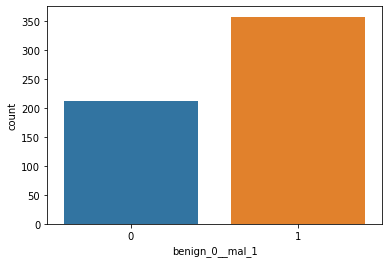

In [5]:
sns.countplot(x="benign_0__mal_1", data = cancer)

With this correlation list, we can see that there are eight strong negative correlations in terms of if the cancer is benign or malignant.

In [6]:
cancer.corr()["benign_0__mal_1"].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

Let's plot the previous list.

<AxesSubplot:>

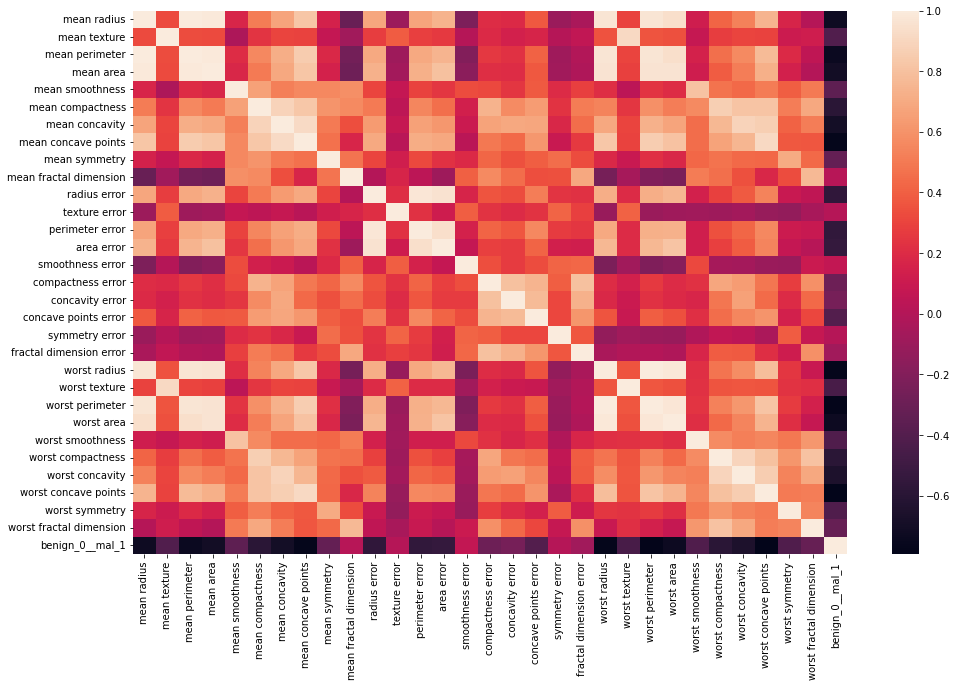

In [7]:
plt.figure(figsize=(16,10))
sns.heatmap(cancer.corr())

# LET'S START WITH THE DEEP LEARNING PROCESS

As normal, we are going to separate the orginal dataset into two, X is going to be the numerical data and y is going to be that variable that we would like to predict.

In [8]:
X =cancer.drop("benign_0__mal_1", axis =1).values
y= cancer["benign_0__mal_1"].values

Now we are going to separate once again, now into four, two datasets into train the model and the other two for evaluating the model.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 101) 

Before starting creating and training our model, we need to standarize our information. Which mean that we are going to grab the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum .

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
X_train = scaler.fit_transform(X_train)

In [14]:
X_test = scaler.fit_transform(X_test)

Let's start with the creation of the model, in this case is going to be a two hidden layers of 30 and 15 neurons with the Rectified Linear, which allows it to model complex relationships between inputs and outputs.

One final layer with just one neuron.

And compile with the binary cross-entropy as a loss function, which is commonly used for binary classification problems. This loss function measures the difference between the true and predicted output in terms of the probability distribution of the classes, and aims to minimize the log loss between the true and predicted probabilities.

As optimizer, we used Adam, which is an adaptive optimization algorithm that is well-suited for gradient-based optimization of large-scale neural networks. It uses a combination of first and second-order moments of the gradient to adaptively adjust the learning rate during training, which can help to improve the convergence rate and stability of the learning process.

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [17]:
X_train.shape

(426, 30)

In [19]:
model = Sequential()

model.add(Dense(30, activation = "relu"))
model.add(Dense(15, activation = "relu"))

model.add(Dense(1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer = "adam")

Now, let's train the model with the information of X_train and y_train, with 600 epochs or in other words, 600 cicles that the model will go again and again learning. And as a validation that is going to define the performance of our model.

In [21]:
model.fit(x=X_train, y=y_train, epochs = 600, validation_data = (X_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 41ms/step - loss: 0.6491 - val_loss: 0.6326
Epoch 2/600
14/14 [==============================] - 0s 18ms/step - loss: 0.6137 - val_loss: 0.5934
Epoch 3/600
14/14 [==============================] - 0s 15ms/step - loss: 0.5734 - val_loss: 0.5484
Epoch 4/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5289 - val_loss: 0.4974
Epoch 5/600
14/14 [==============================] - 0s 9ms/step - loss: 0.4810 - val_loss: 0.4459
Epoch 6/600
14/14 [==============================] - 0s 14ms/step - loss: 0.4336 - val_loss: 0.3976
Epoch 7/600
14/14 [==============================] - 0s 12ms/step - loss: 0.3911 - val_loss: 0.3541
Epoch 8/600
14/14 [==============================] - 0s 32ms/step - loss: 0.3489 - val_loss: 0.3095
Epoch 9/600
14/14 [==============================] - 0s 10ms/step - loss: 0.3091 - val_loss: 0.2709
Epoch 10/600
14/14 [==============================] - 0s 16ms/step - loss: 0.2772 - val_loss: 0.2468
E

Epoch 163/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0452 - val_loss: 0.4064
Epoch 164/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0441 - val_loss: 0.3388
Epoch 165/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0436 - val_loss: 0.4109
Epoch 166/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0438 - val_loss: 0.3703
Epoch 167/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0442 - val_loss: 0.3693
Epoch 168/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0434 - val_loss: 0.3861
Epoch 169/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0437 - val_loss: 0.3603
Epoch 170/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0440 - val_loss: 0.4071
Epoch 171/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0426 - val_loss: 0.3315
Epoch 172/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0466 -

14/14 [==============================] - 0s 10ms/step - loss: 0.0406 - val_loss: 0.6410
Epoch 324/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0394 - val_loss: 0.6923
Epoch 325/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0419 - val_loss: 0.6890
Epoch 326/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0358 - val_loss: 0.6494
Epoch 327/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0511 - val_loss: 0.6572
Epoch 328/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0423 - val_loss: 0.6962
Epoch 329/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0369 - val_loss: 0.6626
Epoch 330/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0340 - val_loss: 0.6745
Epoch 331/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0334 - val_loss: 0.6643
Epoch 332/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0341 - val_loss: 0.6368
Epo

14/14 [==============================] - 0s 9ms/step - loss: 0.0308 - val_loss: 0.8828
Epoch 486/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0283 - val_loss: 0.8762
Epoch 487/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0314 - val_loss: 0.8249
Epoch 488/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0266 - val_loss: 0.9286
Epoch 489/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0303 - val_loss: 0.9048
Epoch 490/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0321 - val_loss: 0.9416
Epoch 491/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0321 - val_loss: 0.7974
Epoch 492/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0273 - val_loss: 0.9882
Epoch 493/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0328 - val_loss: 0.7959
Epoch 494/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0301 - val_loss: 0.9193
Epoc

Epoch 566/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0256 - val_loss: 0.9722
Epoch 567/600
14/14 [==============================] - 0s 17ms/step - loss: 0.0246 - val_loss: 0.9703
Epoch 568/600
14/14 [==============================] - 0s 24ms/step - loss: 0.0268 - val_loss: 0.9757
Epoch 569/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0243 - val_loss: 1.0401
Epoch 570/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0234 - val_loss: 0.9566
Epoch 571/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0236 - val_loss: 1.0799
Epoch 572/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0288 - val_loss: 0.9641
Epoch 573/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0251 - val_loss: 1.0494
Epoch 574/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0251 - val_loss: 1.0362
Epoch 575/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0273

# WE GOT AN ISSUE

We are overfitting our model. The viz shows that the loss is getting higher while the model is learning.

<AxesSubplot:>

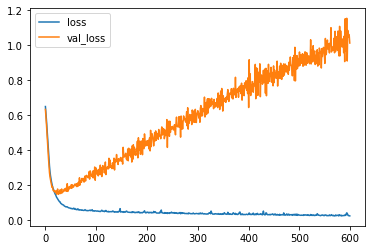

In [22]:
loss = pd.DataFrame(model.history.history)
loss.plot()

# BUILDING OUR MODEL AGAIN

We need to add another feature to our model. The Early Stopping.

In [23]:
model = Sequential()

model.add(Dense(30, activation = "relu"))
model.add(Dense(15, activation = "relu"))

model.add(Dense(1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer = "adam")

The Early Stopping is a technique used during the training process of a neural network to prevent overfitting and improve generalization performance.

How works?

Early stopping monitors a metric during the training process, such as the validation loss or accuracy, and stops the training process early if the metric stops improving or starts to worsen. This is intended to prevent the model from overfitting to the training data, which can occur if the model is allowed to continue training for too many epochs. Early stopping can help to improve the generalization performance of the model, which is its ability to perform well on new, unseen data.

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25)

It is the same creation process but now we add another parameter.

In [26]:
model.fit(x=X_train, y=y_train, epochs = 600, validation_data = (X_test, y_test),
         callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 2s 30ms/step - loss: 0.6837 - val_loss: 0.6640
Epoch 2/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6526 - val_loss: 0.6132
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6032 - val_loss: 0.5625
Epoch 4/600
14/14 [==============================] - 0s 10ms/step - loss: 0.5498 - val_loss: 0.5065
Epoch 5/600
14/14 [==============================] - 0s 9ms/step - loss: 0.4947 - val_loss: 0.4492
Epoch 6/600
14/14 [==============================] - 0s 12ms/step - loss: 0.4396 - val_loss: 0.3963
Epoch 7/600
14/14 [==============================] - 0s 9ms/step - loss: 0.3884 - val_loss: 0.3480
Epoch 8/600
14/14 [==============================] - 0s 10ms/step - loss: 0.3406 - val_loss: 0.3078
Epoch 9/600
14/14 [==============================] - 0s 9ms/step - loss: 0.3014 - val_loss: 0.2670
Epoch 10/600
14/14 [==============================] - 0s 9ms/step - loss: 0.2659 - val_loss: 0.2431
Epoch

# NOW THE MODEL IS GOOD BUT IT CAN BE BETTER

So now, the Early Stopping will break the learning cicle when the metric is getting worse. In this case, the result is not that good, so let's again training the model.

<AxesSubplot:>

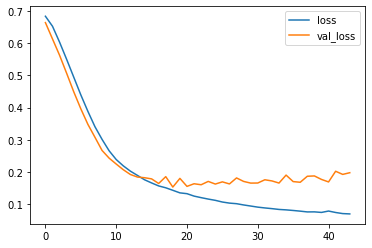

In [27]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

We will add another featured to avoid the overfitting. Now is the Dropout.


The dropout is a method used to add a dropout layer to a neural network model. Dropout is a regularization technique that is commonly used to prevent overfitting in neural networks.

The Dropout layer randomly sets a fraction of the input units to zero during each training iteration. This has the effect of reducing the capacity of the neural network and can prevent the model from memorizing the training data too closely. By randomly dropping out some of the input units during each iteration, the model is forced to learn more robust and generalizable representations of the input data.

The argument 0.5 passed to Dropout() specifies the fraction of the input units that will be randomly set to zero during training. In this case, 50% of the input units will be randomly dropped out during each training iteration.

In [28]:
model = Sequential()

model.add(Dense(30, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(15, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer = "adam")

In [29]:
model.fit(x=X_train, y=y_train, epochs = 600, validation_data = (X_test, y_test),
         callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 3s 31ms/step - loss: 0.7309 - val_loss: 0.6832
Epoch 2/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6903 - val_loss: 0.6658
Epoch 3/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6703 - val_loss: 0.6536
Epoch 4/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6630 - val_loss: 0.6391
Epoch 5/600
14/14 [==============================] - 0s 12ms/step - loss: 0.6533 - val_loss: 0.6236
Epoch 6/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6340 - val_loss: 0.5963
Epoch 7/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6331 - val_loss: 0.5728
Epoch 8/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6080 - val_loss: 0.5475
Epoch 9/600
14/14 [==============================] - 0s 10ms/step - loss: 0.5831 - val_loss: 0.5179
Epoch 10/600
14/14 [==============================] - 0s 10ms/step - loss: 0.5660 - val_loss: 0.4833
Ep

# NOW WE HAVE GOOD RESULTS

<AxesSubplot:>

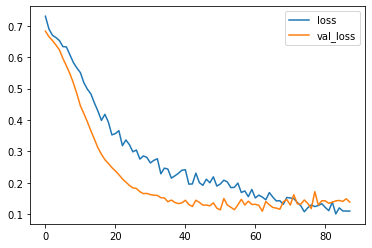

In [30]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

Let's make predictions to compare with our model.

In [33]:
pre = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 3ms/step


# RESULTS

We got an accuracy of 94%, which is pretty good. So basically we can detect if cancer is benign vs malignant  with an accurateness of 94%.

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
print(classification_report(y_test, pre))
print("********************************************")
print(confusion_matrix(y_test, pre))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        55
           1       0.99      0.92      0.95        88

    accuracy                           0.94       143
   macro avg       0.94      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143

********************************************
[[54  1]
 [ 7 81]]
